## Card Dataset Creator 
The objective of this notebook is to save images of each playing card to generate a complete dataset that can be used for training. This is crucial for the successful implementation of this code due to simplicity of the training data used. 

In [74]:
# Imports 
import cv2, os
from PIL import Image
import time
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def saveImgs(cap, dataFolder, cardName, numImgs):    

    cardFolder = dataFolder+cardName+'/'
    if not os.path.isdir(cardFolder): os.mkdir(cardFolder)
    for idx in range(numImgs):
        ret, frame = cap.read()

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)          # BGR -> RGB
        frameBlur = cv2.GaussianBlur(frame, (3,3), 5,5)         # Gaussian Blur 
        frameHSV = cv2.cvtColor(frameBlur, cv2.COLOR_RGB2HSV);  # RGB -> HSV 

        sensitivity = 85                              # Adjust sensitivity based on current lighting
        lower_white = np.array([0,0,255-sensitivity])
        upper_white = np.array([255,sensitivity,255])

        # mask = cv2.inRange(frameHSV,180,255) # get mask 
        dp = 10
        mask = cv2.inRange(frameHSV,lower_white,upper_white) # get mask 
        cnts,_ = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # Find contours 
        index_sort = sorted(range(len(cnts)), key=lambda i : cv2.contourArea(cnts[i]),reverse=True)
        x,y,w,h = cv2.boundingRect(cnts[index_sort[0]])
        frameF = frame[y-dp:y+h+dp, x-dp:x+w+dp, :]

        framePIL = Image.fromarray(frameF) # convert to PIL image 

        filePath = cardFolder + cardName + str(idx) + '.jpg'
        
        # print(filePath)
        framePIL.save(filePath)

The following section loops through all 52 playing cards and saves them to a directory "Cards_Dataset2" 

In [79]:
# get frame 
dataFolder = 'Cards_Dataset2/'          # Target Folder where images are saved! 
SUITS = ['H', 'D', 'S', 'C']
RANKS = ['A', 'K', 'Q', 'J', '10', '9', '8', '7', '6', '5', '4', '3', '2']


# Initialize the camera
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    print("Error: Could not open camera")

ids, idr = 3, 1
try:
    while True:
        ret, frame = cap.read()
        if not ret: print('Camera frame could not be read!'); break

        cv2.imshow('Searching for card!', frame)

        # Break if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
        elif cv2.waitKey(1) & 0xFF == ord('c'): 
            cardName = RANKS[idr] + SUITS[ids]
            print(f'Capturing images ({cardName})...', end='')
            saveImgs(cap, dataFolder, cardName, 50)
            idr += 1
            if idr == len(RANKS): ids += 1; idr = 0; 
            cardName2 = RANKS[idr] + SUITS[ids]           
            print(f'COMPLETE! Select card: {cardName2}')
            
finally:
    cap.release()
    cv2.destroyAllWindows()
    
        
        


Capturing images (KC)...COMPLETE! Select card: QC


KeyboardInterrupt: 

[5, 11, 10, 12, 14, 13, 15, 18, 17, 6, 19, 9, 16, 8, 7, 20, 21, 1, 2, 0, 3, 4, 22]


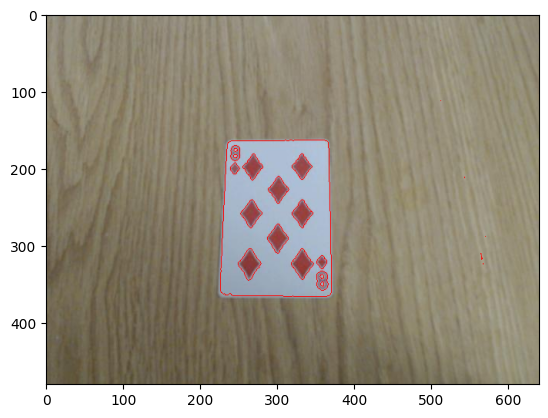

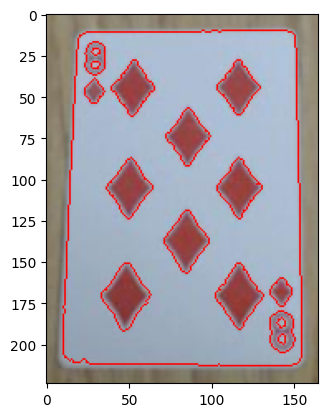

In [67]:
frame = cv2.imread('Cards_Dataset2/AH/AH6.jpg'); 
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)          # BGR -> RGB
frameHSV = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV);  # RGB -> HSV 
frameBlur = cv2.GaussianBlur(frame, (3,3), 5,5)         # Gaussian Blur 


sensitivity = 85                             # Adjust sensitivity based on current lighting
lower_white = np.array([0,0,255-sensitivity])
upper_white = np.array([255,sensitivity,255])

# mask = cv2.inRange(frameHSV,180,255) # get mask 
dp = 10
mask = cv2.inRange(frameHSV,lower_white,upper_white) # get mask 
cnts,_ = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # Find contours 
index_sort = sorted(range(len(cnts)), key=lambda i : cv2.contourArea(cnts[i]),reverse=True)
x,y,w,h = cv2.boundingRect(cnts[index_sort[0]])
frameF = frame[y-dp:y+h+dp, x-dp:x+w+dp, :]

frame_wConts = cv2.drawContours(frame, cnts, -1, (255,0,0), 1)
plt.figure()
plt.imshow(frame_wConts)

plt.figure()
plt.imshow(frameF)


framePIL = Image.fromarray(frame) # convert to PIL image 
